In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
df=pd.read_csv("Fertilizer Prediction.csv")
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [29]:
df.isnull().sum()

Temparature        0
Humidity           0
Moisture           0
Soil Type          0
Crop Type          0
Nitrogen           0
Potassium          0
Phosphorous        0
Fertilizer Name    0
dtype: int64

In [30]:
df["Fertilizer Name"].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

In [31]:
df["Soil Type"].value_counts()

Soil Type
Loamy     21
Sandy     20
Clayey    20
Black     19
Red       19
Name: count, dtype: int64

In [32]:
df["Crop Type"].value_counts()

Crop Type
Sugarcane      13
Cotton         12
Millets        11
Paddy          10
Pulses         10
Wheat           9
Tobacco         7
Barley          7
Oil seeds       7
Ground Nuts     7
Maize           6
Name: count, dtype: int64

In [33]:
map1={label:idx for idx,label in enumerate(np.unique(df['Soil Type'].values))}

df["Soil Type"]=df["Soil Type"].map(map1)

In [34]:
df["Soil Type"].value_counts()

Soil Type
2    21
4    20
1    20
0    19
3    19
Name: count, dtype: int64

In [35]:
map2 = {label:idx for idx,label in enumerate(np.unique(df['Crop Type'].values))}

df["Crop Type"]=df["Crop Type"].map(map2)

In [36]:
df["Crop Type"].value_counts()

Crop Type
8     13
1     12
4     11
6     10
7     10
10     9
9      7
0      7
5      7
2      7
3      6
Name: count, dtype: int64

In [37]:
map3 = {label:idx for idx,label in enumerate(np.unique(df['Fertilizer Name'].values))}

df['Fertilizer Name']=df['Fertilizer Name'].map(map3)

In [38]:
df["Fertilizer Name"].value_counts()

Fertilizer Name
6    22
5    18
4    17
1    14
3    14
2     7
0     7
Name: count, dtype: int64

In [39]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [40]:
df.drop('Humidity ',axis=1,inplace=True)

C:\Users\srini\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


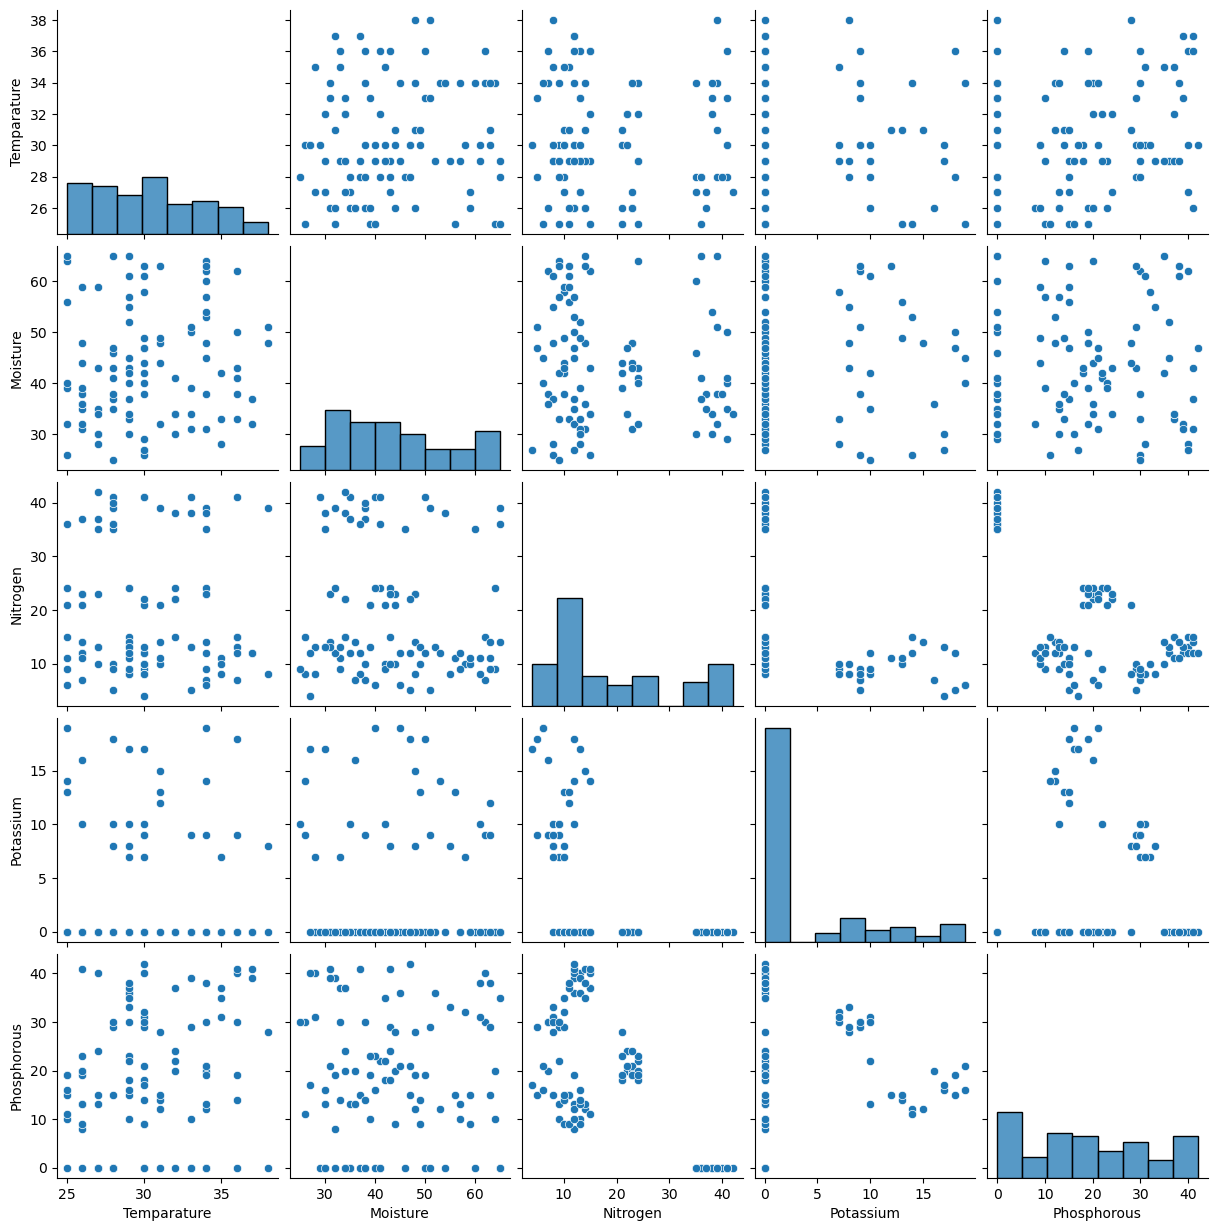

In [41]:
sns.pairplot(data = df, vars=['Temparature',	'Moisture','Nitrogen',	'Potassium',	'Phosphorous',])
plt.show()

In [42]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

In [44]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
lda.fit(X_train,y_train)

LinearDiscriminantAnalysis()

In [45]:
y_pred = lda.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test, y_pred)
print("LDA for Classifcation model accuracy (in %):", acc*100)

LDA for Classifcation model accuracy (in %): 100.0


In [47]:
yresult=pd.DataFrame(y_pred,columns=['Fertilizer Name'])

In [48]:
yresult

,Fertilizer Name
0,4
1,3
2,0
3,6
4,5
5,4
6,6
7,4
8,5
9,6


In [49]:
temp = int(input("Enter the Temperature value : "))
moist = int(input("Enter the Moisture value : "))
soilType = input("Enter the soiltype as mentioned in the above cell : ")
cropType = input("Enter the croptype as mentioned in the above cell : ")
nitro = int(input("Enter the Nitrogen concentration value : "))
potass = int(input("Enter the Potassium concentration value :"))
phospho = int(input("Enter the Phosphorous concentration value : "))

vector = [temp,moist,map1[soilType],map2[cropType],nitro,potass,phospho]

print(vector)

Enter the Temperature value : 26
Enter the Moisture value : 38
Enter the soiltype as mentioned in the above cell : Sandy
Enter the croptype as mentioned in the above cell : Maize
Enter the Nitrogen concentration value : 37
Enter the Potassium concentration value :0
Enter the Phosphorous concentration value : 0
[26, 38, 4, 3, 37, 0, 0]


In [51]:
dff = pd.DataFrame(vector)
res = list(lda.predict(dff[[0]].T))[0]

map4 = {map3[index]:index for index in map3}

print("The best fertilizer to use for the above conditions you mentioned is : ",map4[res])

The best fertilizer to use for the above conditions you mentioned is :  Urea


C:\Users\srini\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  warnings.warn(
